In [4]:
#!pip install bokeh
#!pip install numpy
#!pip install pandas
#!pip install jupyter_bokeh
#!pip install openpyxl
#!pip install matplotlib

**Importing Libraries**


In [8]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Bright6
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui
from IPython.display import HTML
from IPython.display import IFrame
from IPython.core.display import display

C:\Users\Admin\AppData\Local\Temp\ipykernel_5164\3920641479.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


**Data Understanding :**


1.   ID :Represents Station names.
2.   Date_and_Time:Represents Station opening/closing time.
3.   Openny : Represents open and closing time.
4.   State : Where Pumps are located.



**Reading Dataset**

In [14]:
# Read specific excel sheet
partner_stations = pd.read_excel(r'dataset.xlsx', sheet_name='Sheet2')

In [15]:
pivot_ui(partner_stations)
HTML('pivottablejs.html')

**Show data in csv format**

In [365]:
partner_stations.head(2)

ID   status_change_date OpenYN State
0  664  01/11/2021 10:08:27      Y    AL
1  664  02/11/2021 02:44:29      N    AL

**Extract Features from datetime**

In [366]:
partner_stations.rename(columns = {'status_change_date':'Status_change_date'}, inplace = True)
partner_stations['Status_change_date'] = pd.to_datetime(partner_stations['Status_change_date'])
partner_stations['Date']=partner_stations['Status_change_date'].dt.date
partner_stations['Day']=partner_stations['Status_change_date'].dt.day
partner_stations['Month']=partner_stations['Status_change_date'].dt.month
partner_stations['Year']=partner_stations['Status_change_date'].dt.year
partner_stations['Hour']=partner_stations['Status_change_date'].dt.hour
partner_stations['Minute']=partner_stations['Status_change_date'].dt.minute

#### This Assigned variable is used to draw graphs

In [367]:
df=partner_stations

**Total No of Stations and States**

In [368]:
print('Total No Of Stations :',len(partner_stations['ID'].value_counts().unique()))
print('Total No Of States :',len(partner_stations['State'].value_counts().unique()))

Total No Of Stations : 251
Total No Of States : 42


#### Sorting Value and dropping duplicates

In [330]:
partner_stations.drop_duplicates(inplace=True)
partner_stations.sort_values(by=['ID','Status_change_date','OpenYN','State','Date','Day','Month','Year','Hour','Minute'],inplace=True)
partner_stations=partner_stations.reset_index().drop('index',axis=1)

#### Performing data cleaning

In [331]:
list_=[]
rows=partner_stations.shape[0]
for i in range(0,rows) :
    if i==rows-1 :
        break
    if partner_stations.iloc[i]['OpenYN']==partner_stations.iloc[i+1]['OpenYN'] and partner_stations.iloc[i]['ID']==partner_stations.iloc[i+1]['ID']:
        list_.append(i)

In [332]:
partner_stations.drop(list_,axis=0,inplace=True)

In [333]:
list_=[]
a=partner_stations['ID'].unique()
for i in a :
    open_station_date_yes=partner_stations.loc[(partner_stations['OpenYN']=='Y') & (partner_stations['ID']==i)]
    closing_station_date_no=partner_stations.loc[(partner_stations['OpenYN']=='N') & (partner_stations['ID']==i)]
    
    if open_station_date_yes.shape[0] > closing_station_date_no.shape[0] :
        j=open_station_date_yes.reset_index()['index'].tolist()[-1]
        list_.append(j)
    if closing_station_date_no.shape[0] > open_station_date_yes.shape[0] :
        j=closing_station_date_no.reset_index()['index'][0]
        list_.append(j)
        

In [334]:
partner_stations.drop(list_,axis=0,inplace=True)

In [339]:
partner_stations.head(2)

ID  Status_change_date OpenYN State        Date  Day  Month  Year  Hour  \
0  10 2021-01-11 09:37:30      Y    CT  2021-01-11   11      1  2021     9   
1  10 2021-01-11 17:10:18      N    CT  2021-01-11   11      1  2021    17   

   Minute  
0      37  
1      10

In [340]:
a=partner_stations['ID'].unique()
for i in a :
    open_station_date_yes=partner_stations.loc[(partner_stations['OpenYN']=='Y') & (partner_stations['ID']==i)]
    closing_station_date_no=partner_stations.loc[(partner_stations['OpenYN']=='N') & (partner_stations['ID']==i)]
    if open_station_date_yes.shape[0]!=closing_station_date_no.shape[0] :
        print(i,open_station_date_yes.shape[0],closing_station_date_no.shape[0])

#### Combining data

In [342]:
open_station_date_yes=partner_stations.loc[(partner_stations['OpenYN']=='Y')]
closing_station_date_no=partner_stations.loc[(partner_stations['OpenYN']=='N')]

In [345]:
partner_station_data=open_station_date_yes
partner_station_data['Station_closing_datetime']=closing_station_date_no['Status_change_date'].tolist()
partner_station_data['Station_closing_datetime'] = pd.to_datetime(partner_station_data['Station_closing_datetime'])
partner_station_data['Station_closing_date']=partner_station_data['Station_closing_datetime'].dt.date
partner_station_data['Station_closing_day']=partner_station_data['Station_closing_datetime'].dt.day
partner_station_data['Station_closing_month']=partner_station_data['Station_closing_datetime'].dt.month
partner_station_data['Station_closing_year']=partner_station_data['Station_closing_datetime'].dt.year
partner_station_data['Station_closing_hour']=partner_station_data['Station_closing_datetime'].dt.hour
partner_station_data['Station_closing_minute']=partner_station_data['Station_closing_datetime'].dt.minute
partner_station_data.rename(columns = {'ID':'Id','Status_change_date':'Station_opening_datetime','Date':'Station_opening_date',
                                      'Day':'Station_opening_day','Month':'Station_opening_month',
                                      'Year':'Station_opening_year','Hour':'Station_opening_hour',
                                      'Minute':'Station_opening_minute'}, inplace = True)
partner_station_data.drop(['OpenYN'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2804\2931205682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partner_station_data['Station_closing_datetime']=closing_station_date_no['Status_change_date'].tolist()
C:\Users\Admin\AppData\Local\Temp\ipykernel_2804\2931205682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partner_station_data['Station_closing_datetime'] = pd.to_datetime(partner_station_data['Station_closing_datetime'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2804\2931205682.py:4: Se

#### Finding Metrices on daily basis

##### Station_opening_hour_duration
##### Station_closing_hour_duration
##### Percentage_Station_opening_hour
##### Percentage_Station_closing_hour


In [346]:
partner_station_data['Station_opening_hour_duration']=(partner_station_data.Station_closing_datetime-partner_station_data.Station_opening_datetime).astype('timedelta64[h]')
partner_station_data['Next_day_station_open_datetime']=partner_station_data['Station_opening_datetime'].shift(-1)
partner_station_data.dropna(inplace=True)
partner_station_data['Station_closing_hour_duration']=(partner_station_data.Next_day_station_open_datetime-partner_station_data.Station_closing_datetime).astype('timedelta64[h]')
partner_station_data['Perc_Station_opening_hour']=partner_station_data['Station_opening_hour']/24*100
partner_station_data['Perc_Station_closing_hour']=partner_station_data['Station_closing_hour']/24*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_2804\2376325059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partner_station_data['Station_opening_hour_duration']=(partner_station_data.Station_closing_datetime-partner_station_data.Station_opening_datetime).astype('timedelta64[h]')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2804\2376325059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partner_station_data['Next_day_station_open_datetime']=partner_station_data['Station_opening_datetime'].shift(-1)
C

#### Printing data with required Columns

In [348]:
partner_station_data.head(1)

Id Station_opening_datetime State Station_opening_date  \
0  10      2021-01-11 09:37:30    CT           2021-01-11   

   Station_opening_day  Station_opening_month  Station_opening_year  \
0                   11                      1                  2021   

   Station_opening_hour  Station_opening_minute Station_closing_datetime  ...  \
0                     9                      37      2021-01-11 17:10:18  ...   

  Station_closing_day  Station_closing_month  Station_closing_year  \
0                  11                      1                  2021   

   Station_closing_hour  Station_closing_minute  \
0                    17                      10   

   Station_opening_hour_duration  Next_day_station_open_datetime  \
0                            7.0             2021-01-12 10:43:10   

  Station_closing_hour_duration  Perc_Station_opening_hour  \
0                          17.0                       37.5   

   Perc_Station_closing_hour  
0                  70.833333  

[1 rows x 21 columns]

#### We are drawing histogram on daily basis so we have to take value between 0 to 24 hour duration for each metric .

In [412]:
histogram_opening_station_hours=partner_station_data.loc[(partner_station_data['Station_opening_hour_duration']>=0) & (partner_station_data['Station_opening_hour_duration']<=24)][['Station_opening_hour_duration']]
histogram_closing_station_hours=partner_station_data.loc[(partner_station_data['Station_closing_hour_duration']>=0) & (partner_station_data['Station_closing_hour_duration']<=24)][['Station_closing_hour_duration']]
perc_histogram_closing_station_hours=partner_station_data.loc[(partner_station_data['Station_closing_hour_duration']>=0) & (partner_station_data['Station_closing_hour_duration']<=24)][['Perc_Station_closing_hour']]
perc_histogram_opening_station_hours=partner_station_data.loc[(partner_station_data['Station_opening_hour_duration']>=0) & (partner_station_data['Station_opening_hour_duration']<=24)][['Perc_Station_opening_hour']]

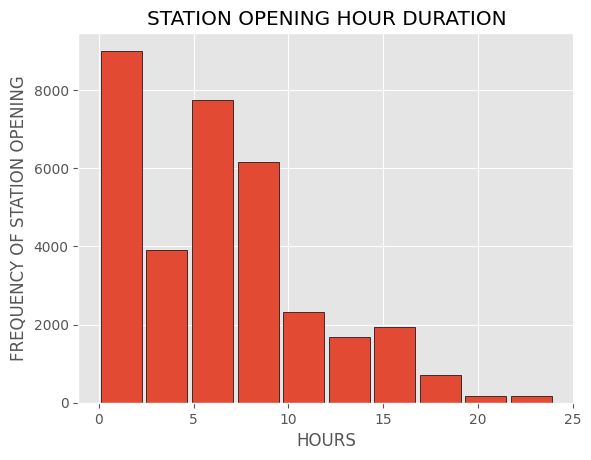

In [424]:
%matplotlib inline
plt.style.use('ggplot')
plt.hist(histogram_opening_station_hours['Station_opening_hour_duration'],rwidth=0.90,ec='black')
plt.title('DAILY STATION OPENING HOUR DURATION')
plt.xlabel('HOURS')
plt.ylabel('FREQUENCY OF STATION OPENING')


plt.show()

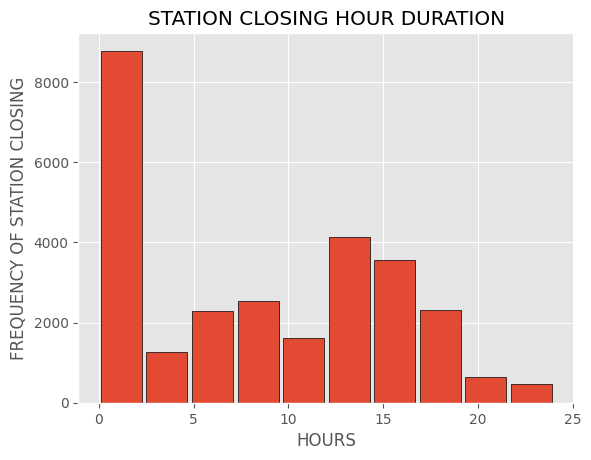

In [425]:
%matplotlib inline
plt.style.use('ggplot')
plt.hist(histogram_closing_station_hours['Station_closing_hour_duration'],rwidth=0.90,ec='black')
plt.title('DAILY STATION CLOSING HOUR DURATION')
plt.xlabel('HOURS')
plt.ylabel('FREQUENCY OF STATION CLOSING')


plt.show()

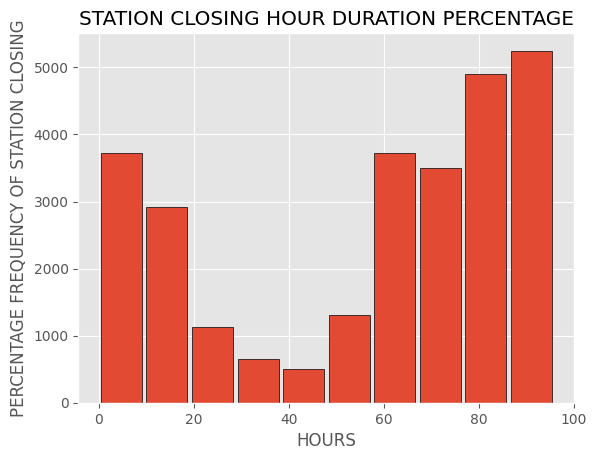

In [427]:
%matplotlib inline
plt.style.use('ggplot')
plt.hist(perc_histogram_closing_station_hours['Perc_Station_closing_hour'],rwidth=0.90,ec='black')
plt.title('DAILY STATION CLOSING HOUR DURATION PERCENTAGE')
plt.xlabel('HOURS')
plt.ylabel('PERCENTAGE FREQUENCY OF STATION CLOSING')


plt.show()

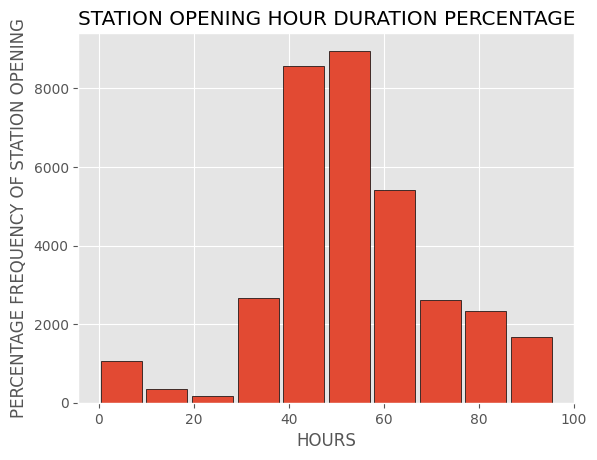

In [428]:
%matplotlib inline
plt.style.use('ggplot')
plt.hist(perc_histogram_opening_station_hours['Perc_Station_opening_hour'],rwidth=0.90,ec='black')
plt.title('DAILY STATION OPENING HOUR DURATION PERCENTAGE')
plt.xlabel('HOURS')
plt.ylabel('PERCENTAGE FREQUENCY OF STATION OPENING')


plt.show()

#### Calculate the frequency of opening and closing of each station

In [369]:
frequency_of_most_opening_and_closing_stations=df[['ID','OpenYN']]
frequency_of_most_opening_and_closing_stations=frequency_of_most_opening_and_closing_stations.groupby(by=['ID','OpenYN']).value_counts().reset_index().rename(columns={0:'Frequency'})

In [370]:
frequency_of_most_opening_and_closing_stations.head(2)

ID OpenYN  Frequency
0  10      N        226
1  10      Y        233

**Stations are opened most of the times**

In [371]:
most_opening_stations=df[['ID','OpenYN']]
most_opening_stations=most_opening_stations.loc[(most_opening_stations['OpenYN']=='Y')]
most_opening_stations=most_opening_stations.value_counts().reset_index().rename(columns={0:'Most_Open_Stations'})

#### BAR SHOWS THE STATIONS THAT ARE OPENED MOST OF THE TIMES

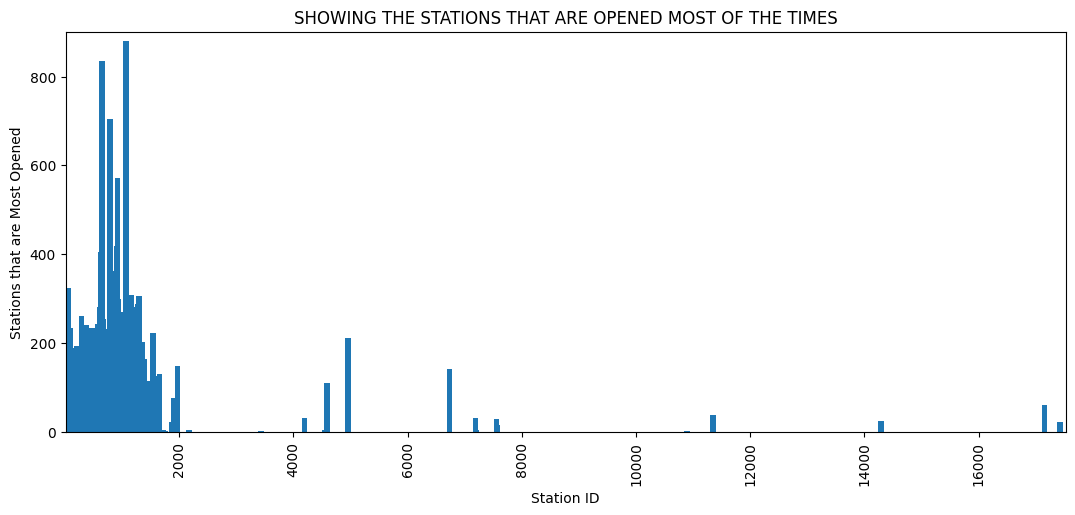

In [372]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(4)
width=100
ax = fig.add_axes([0,0,1,1])
counts = list(most_opening_stations['ID'])
station= list(most_opening_stations['Most_Open_Stations'])
ax.bar(counts,station,width)
min_x=min(counts)
max_x=max(counts)
max_y=max(station)
plt.xlim(min_x,max_x+100)
plt.ylim(0,max_y+20)
plt.xlabel('Station ID')
plt.ylabel('Stations that are Most Opened')
plt.title('SHOWING THE STATIONS THAT ARE OPENED MOST OF THE TIMES')
plt.xticks(rotation = 90)
plt.show()

**Stations are closed most of the times**


In [373]:
most_closed_stations=df[['ID','OpenYN']]
most_closed_stations=most_closed_stations.loc[(most_closed_stations['OpenYN']=='N')]
most_closed_stations=most_closed_stations.value_counts().reset_index().rename(columns={0:'Most_Close_Stations'})

In [374]:
most_closed_stations.head(2)

ID OpenYN  Most_Close_Stations
0  1062      N                  885
1   652      N                  844

#### BAR SHOWS THE STATIONS THAT ARE CLOSED MOST OF THE TIMES

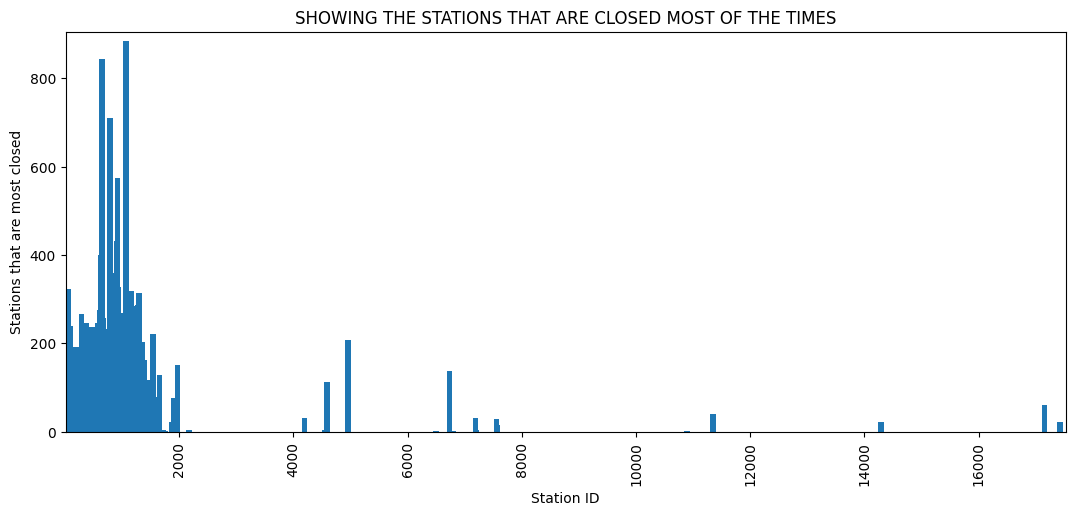

In [375]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(4)
width=100
ax = fig.add_axes([0,0,1,1])
counts = list(most_closed_stations['ID'])
station= list(most_closed_stations['Most_Close_Stations'])
ax.bar(counts,station,width)
min_x=min(counts)
max_x=max(counts)
max_y=max(station)
plt.xlim(min_x,max_x+100)
plt.ylim(0,max_y+20)
plt.xlabel('Station ID')
plt.ylabel('Stations that are most closed')
plt.title('SHOWING THE STATIONS THAT ARE CLOSED MOST OF THE TIMES')
plt.xticks(rotation = 90)
plt.show()

#### Hours in which station open or close most of the times

In [377]:
hours_stations=df[['OpenYN','Hour']]
hours_stations=hours_stations.value_counts().reset_index().rename(columns={0:'Stations_Hours'})
hours_stations.sort_values(by=['Hour'],inplace=True)
yes=hours_stations.loc[(hours_stations['OpenYN']=='Y')]
no=hours_stations.loc[(hours_stations['OpenYN']=='N')]

#### BAR SHOWS THE HOURS IN WHICH STATION OPEN OR CLOSED MOST

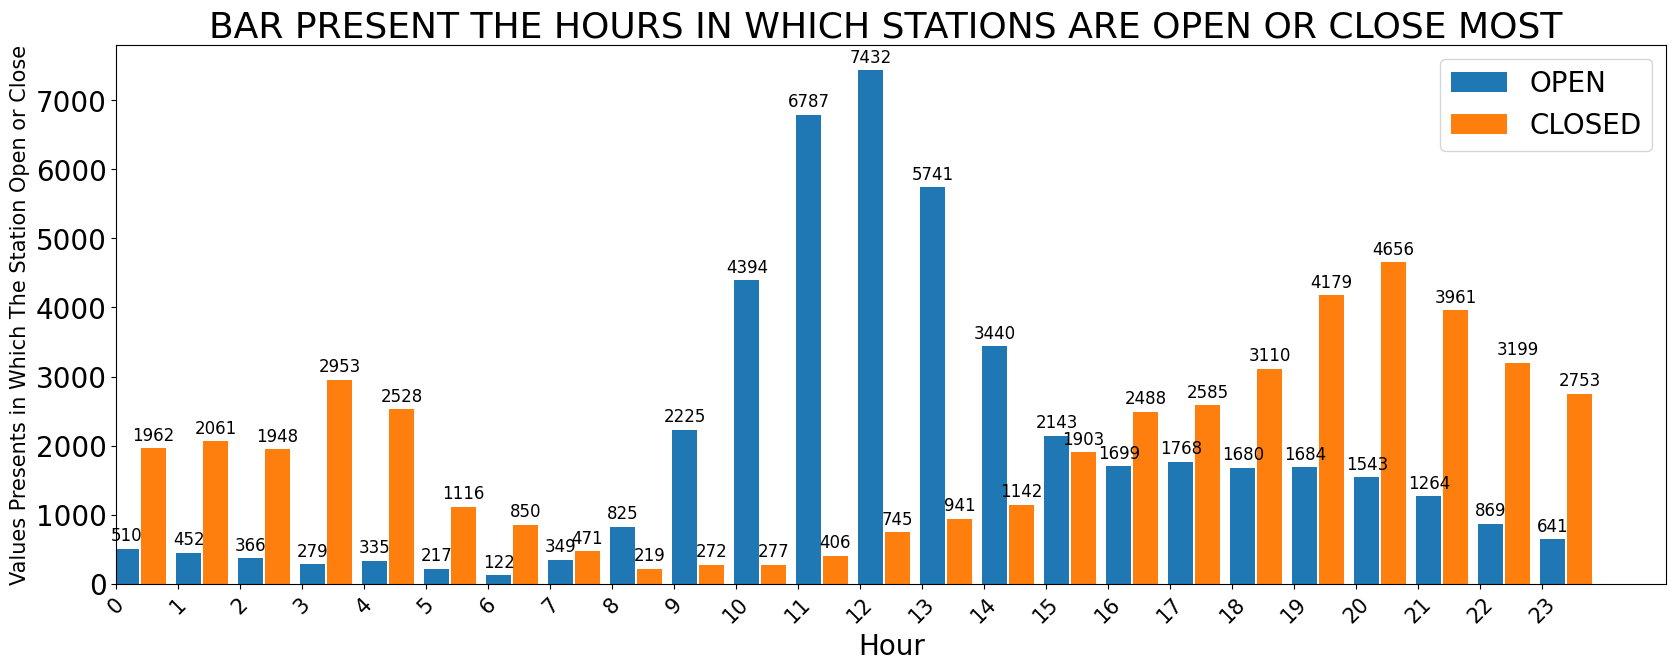

In [378]:

labels=list(yes['Hour'])
l1=list(yes['Stations_Hours'])
l2=list(no['Stations_Hours'])
width = 0.40  # the width of the bars
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(7)
x = np.arange(len(labels))  # the label locations
rects1 = ax.bar(x - width/2+0.37,l1, width, label='OPEN')
rects2 = ax.bar(x + width/2+0.40,l2, width, label='CLOSED')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlim(0,25)
ax.set_ylabel('Values Presents in Which The Station Open or Close',fontsize=15)
ax.set_xlabel('Hour',fontsize=20)

ax.set_title('BAR PRESENT THE HOURS IN WHICH STATIONS ARE OPEN OR CLOSE MOST ',fontsize=26)
ax.set_xticks(labels)
ax.legend(fontsize=20)

ax.bar_label(rects1, padding=3,fontsize=12)
ax.bar_label(rects2, padding=3,fontsize=12)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()


#### Day in which station opens or closed most of the times

In [379]:
hours_stations=df[['OpenYN','Day']]
hours_stations=hours_stations.value_counts().reset_index().rename(columns={0:'Stations_Hours'})
hours_stations.sort_values(by=['Day'],inplace=True)
yes=hours_stations.loc[(hours_stations['OpenYN']=='Y')]
no=hours_stations.loc[(hours_stations['OpenYN']=='N')]

#### BAR SHOWS THE DAY IN WHICH STATION OPEN OR CLOSED MOST

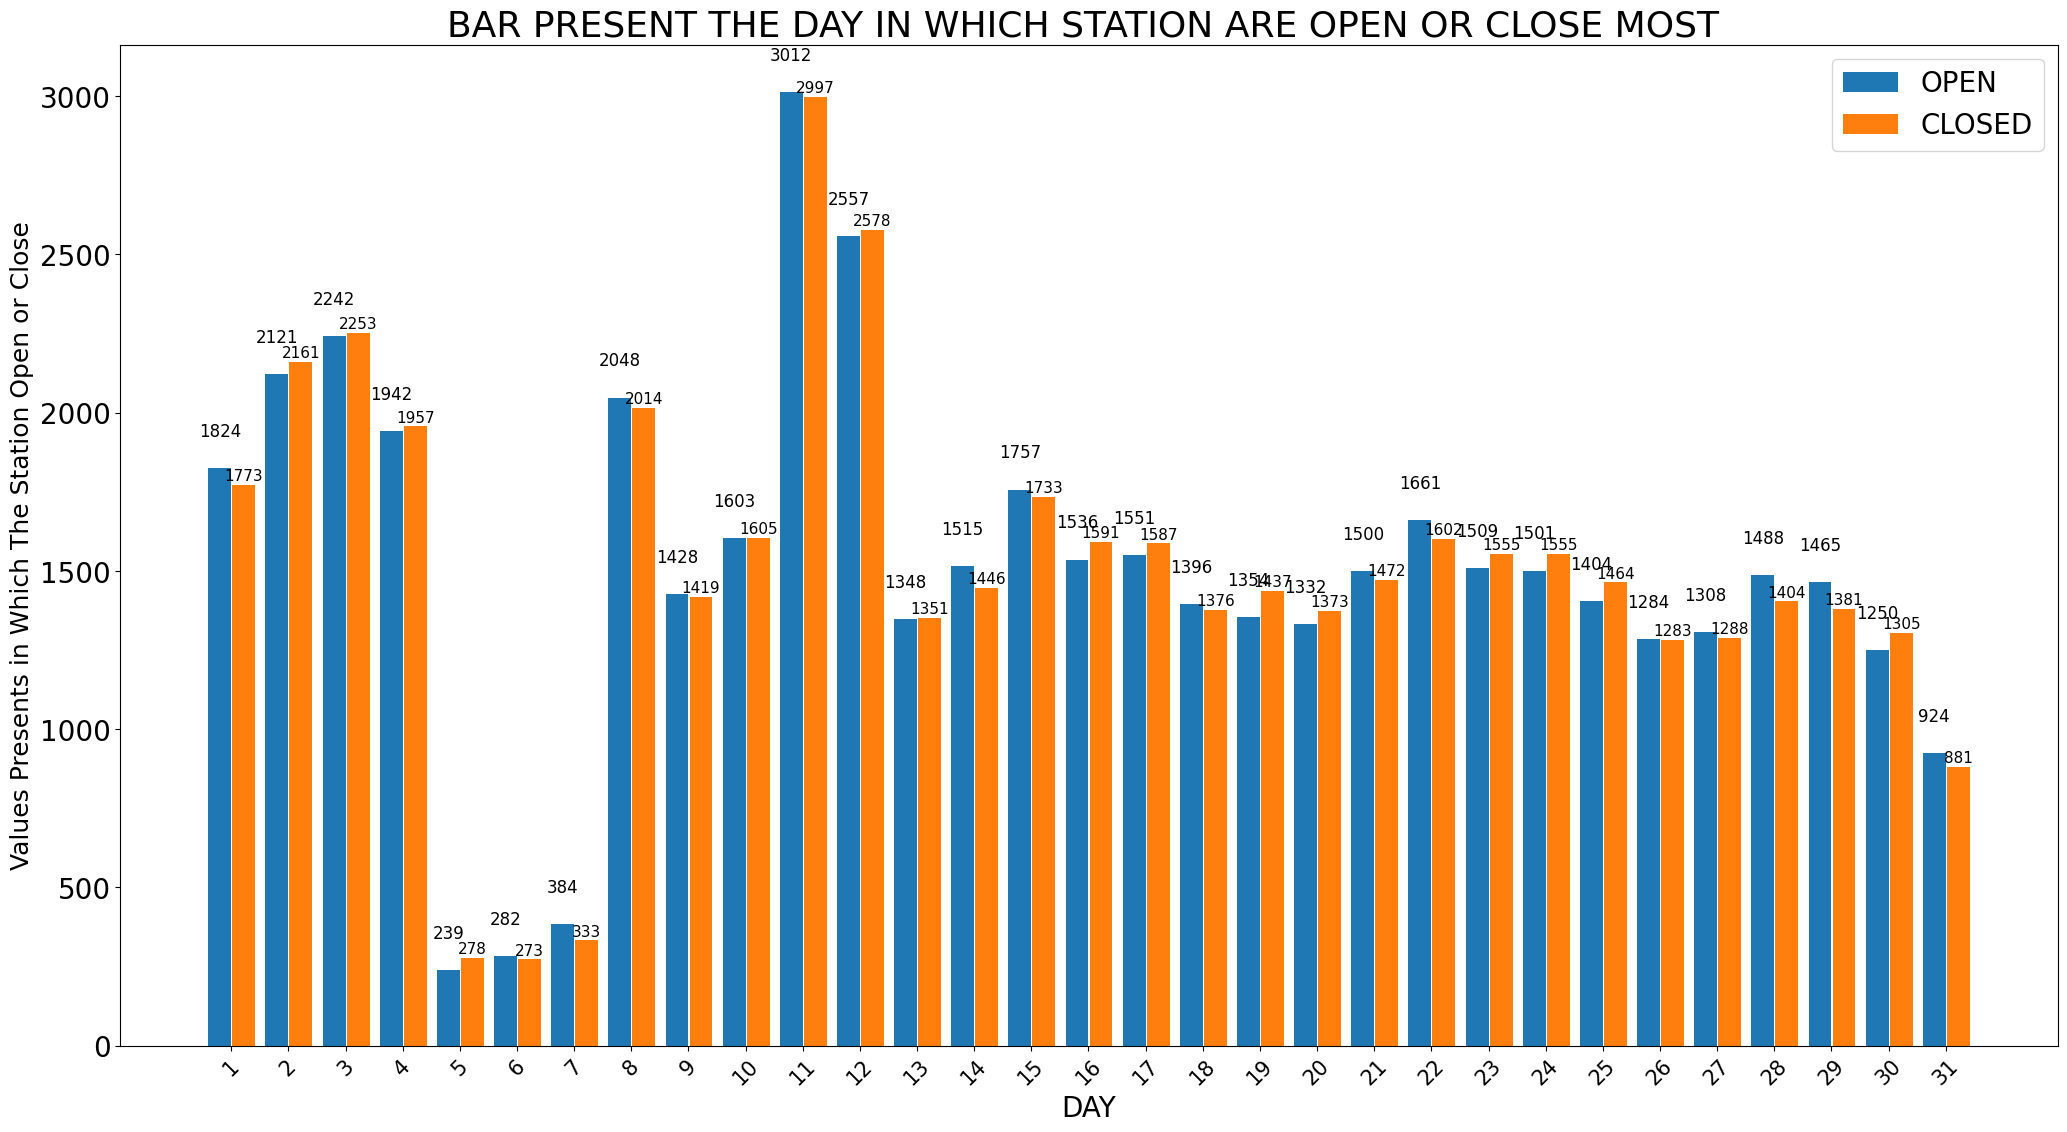

In [380]:
labels=list(yes['Day'])
l1=list(yes['Stations_Hours'])
l2=list(no['Stations_Hours'])
width = 0.40  # the width of the bars
fig, ax = plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(13)
x = np.arange(1,len(labels)+1)  # the label locations
rects1 = ax.bar(x - width/2,l1, width, label='OPEN')
rects2 = ax.bar(x + width/2+0.02,l2, width, label='CLOSED')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values Presents in Which The Station Open or Close',fontsize=18)
ax.set_xlabel('DAY',fontsize=20)

ax.set_title('BAR PRESENT THE DAY IN WHICH STATION ARE OPEN OR CLOSE MOST ',fontsize=26)
ax.set_xticks(labels)
ax.legend(fontsize=20)

ax.bar_label(rects1, padding=20,fontsize=12)
ax.bar_label(rects2, padding=1,fontsize=11)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)

plt.show()


#### Month in which station open or close most of the times

In [381]:
hours_stations=df[['OpenYN','Month']]
hours_stations=hours_stations.value_counts().reset_index().rename(columns={0:'Stations_Hours'})
hours_stations.sort_values(by=['Month'],inplace=True)
yes=hours_stations.loc[(hours_stations['OpenYN']=='Y')]
no=hours_stations.loc[(hours_stations['OpenYN']=='N')]

#### BAR SHOWS THE MONTH IN WHICH THE STATION OPEN AND CLOSE MOST OF THE TIMES

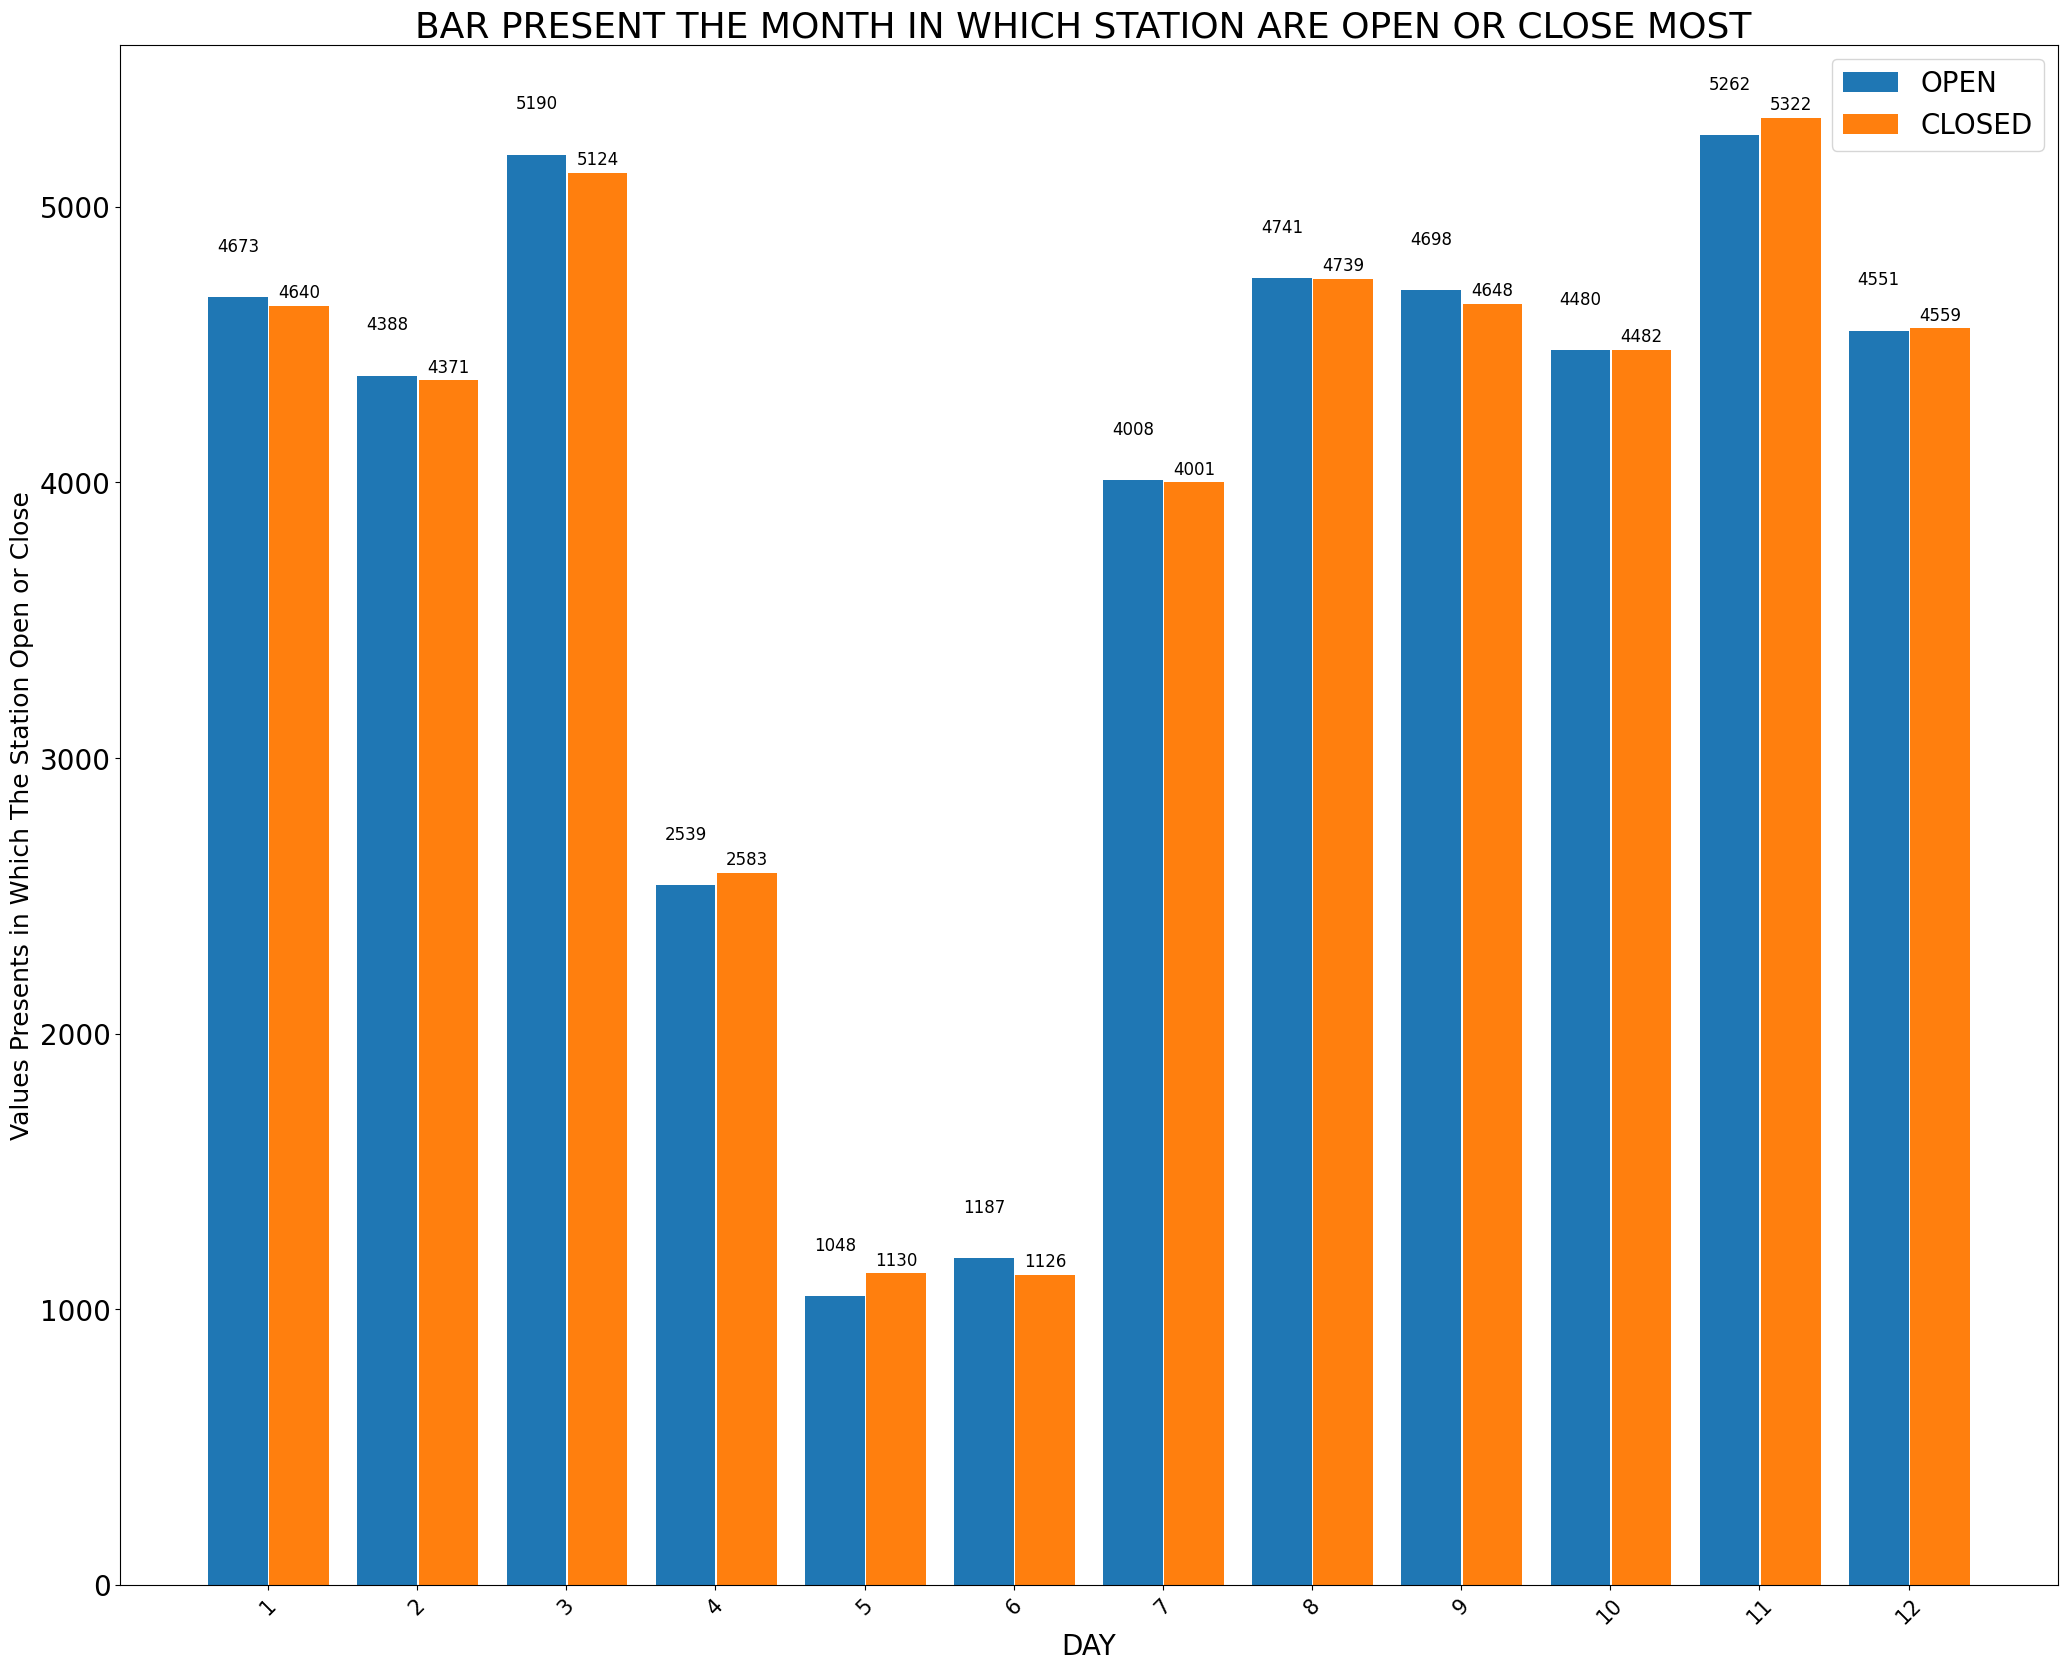

In [382]:
labels=list(np.arange(1,13))
l1=list(yes['Stations_Hours'])
l2=list(no['Stations_Hours'])
width = 0.40  # the width of the bars
fig, ax = plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(20)
x = np.arange(1,len(labels)+1)  # the label locations
rects1 = ax.bar(x - width/2,l1, width, label='OPEN')
rects2 = ax.bar(x + width/2+0.01,l2, width, label='CLOSED')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values Presents in Which The Station Open or Close',fontsize=18)
ax.set_xlabel('DAY',fontsize=20)

ax.set_title('BAR PRESENT THE MONTH IN WHICH STATION ARE OPEN OR CLOSE MOST ',fontsize=26)
ax.set_xticks(labels)
ax.legend(fontsize=20)

ax.bar_label(rects1, padding=30,fontsize=12)
ax.bar_label(rects2, padding=3,fontsize=12)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)

plt.show()


#### Year in which station open or close most of the times

In [383]:
hours_stations=df[['OpenYN','Year']]
hours_stations=hours_stations.value_counts().reset_index().rename(columns={0:'Stations_Hours'})
hours_stations.sort_values(by=['Year'],inplace=True)
yes=hours_stations.loc[(hours_stations['OpenYN']=='Y')]
no=hours_stations.loc[(hours_stations['OpenYN']=='N')]

In [384]:
yes.head(2)

OpenYN  Year  Stations_Hours
3      Y  2021           11402
0      Y  2022           35363

#### BAR SHOWS THE YEAR IN WHICH THE STATION OPEN AND CLOSE MOST OF THE TIMES

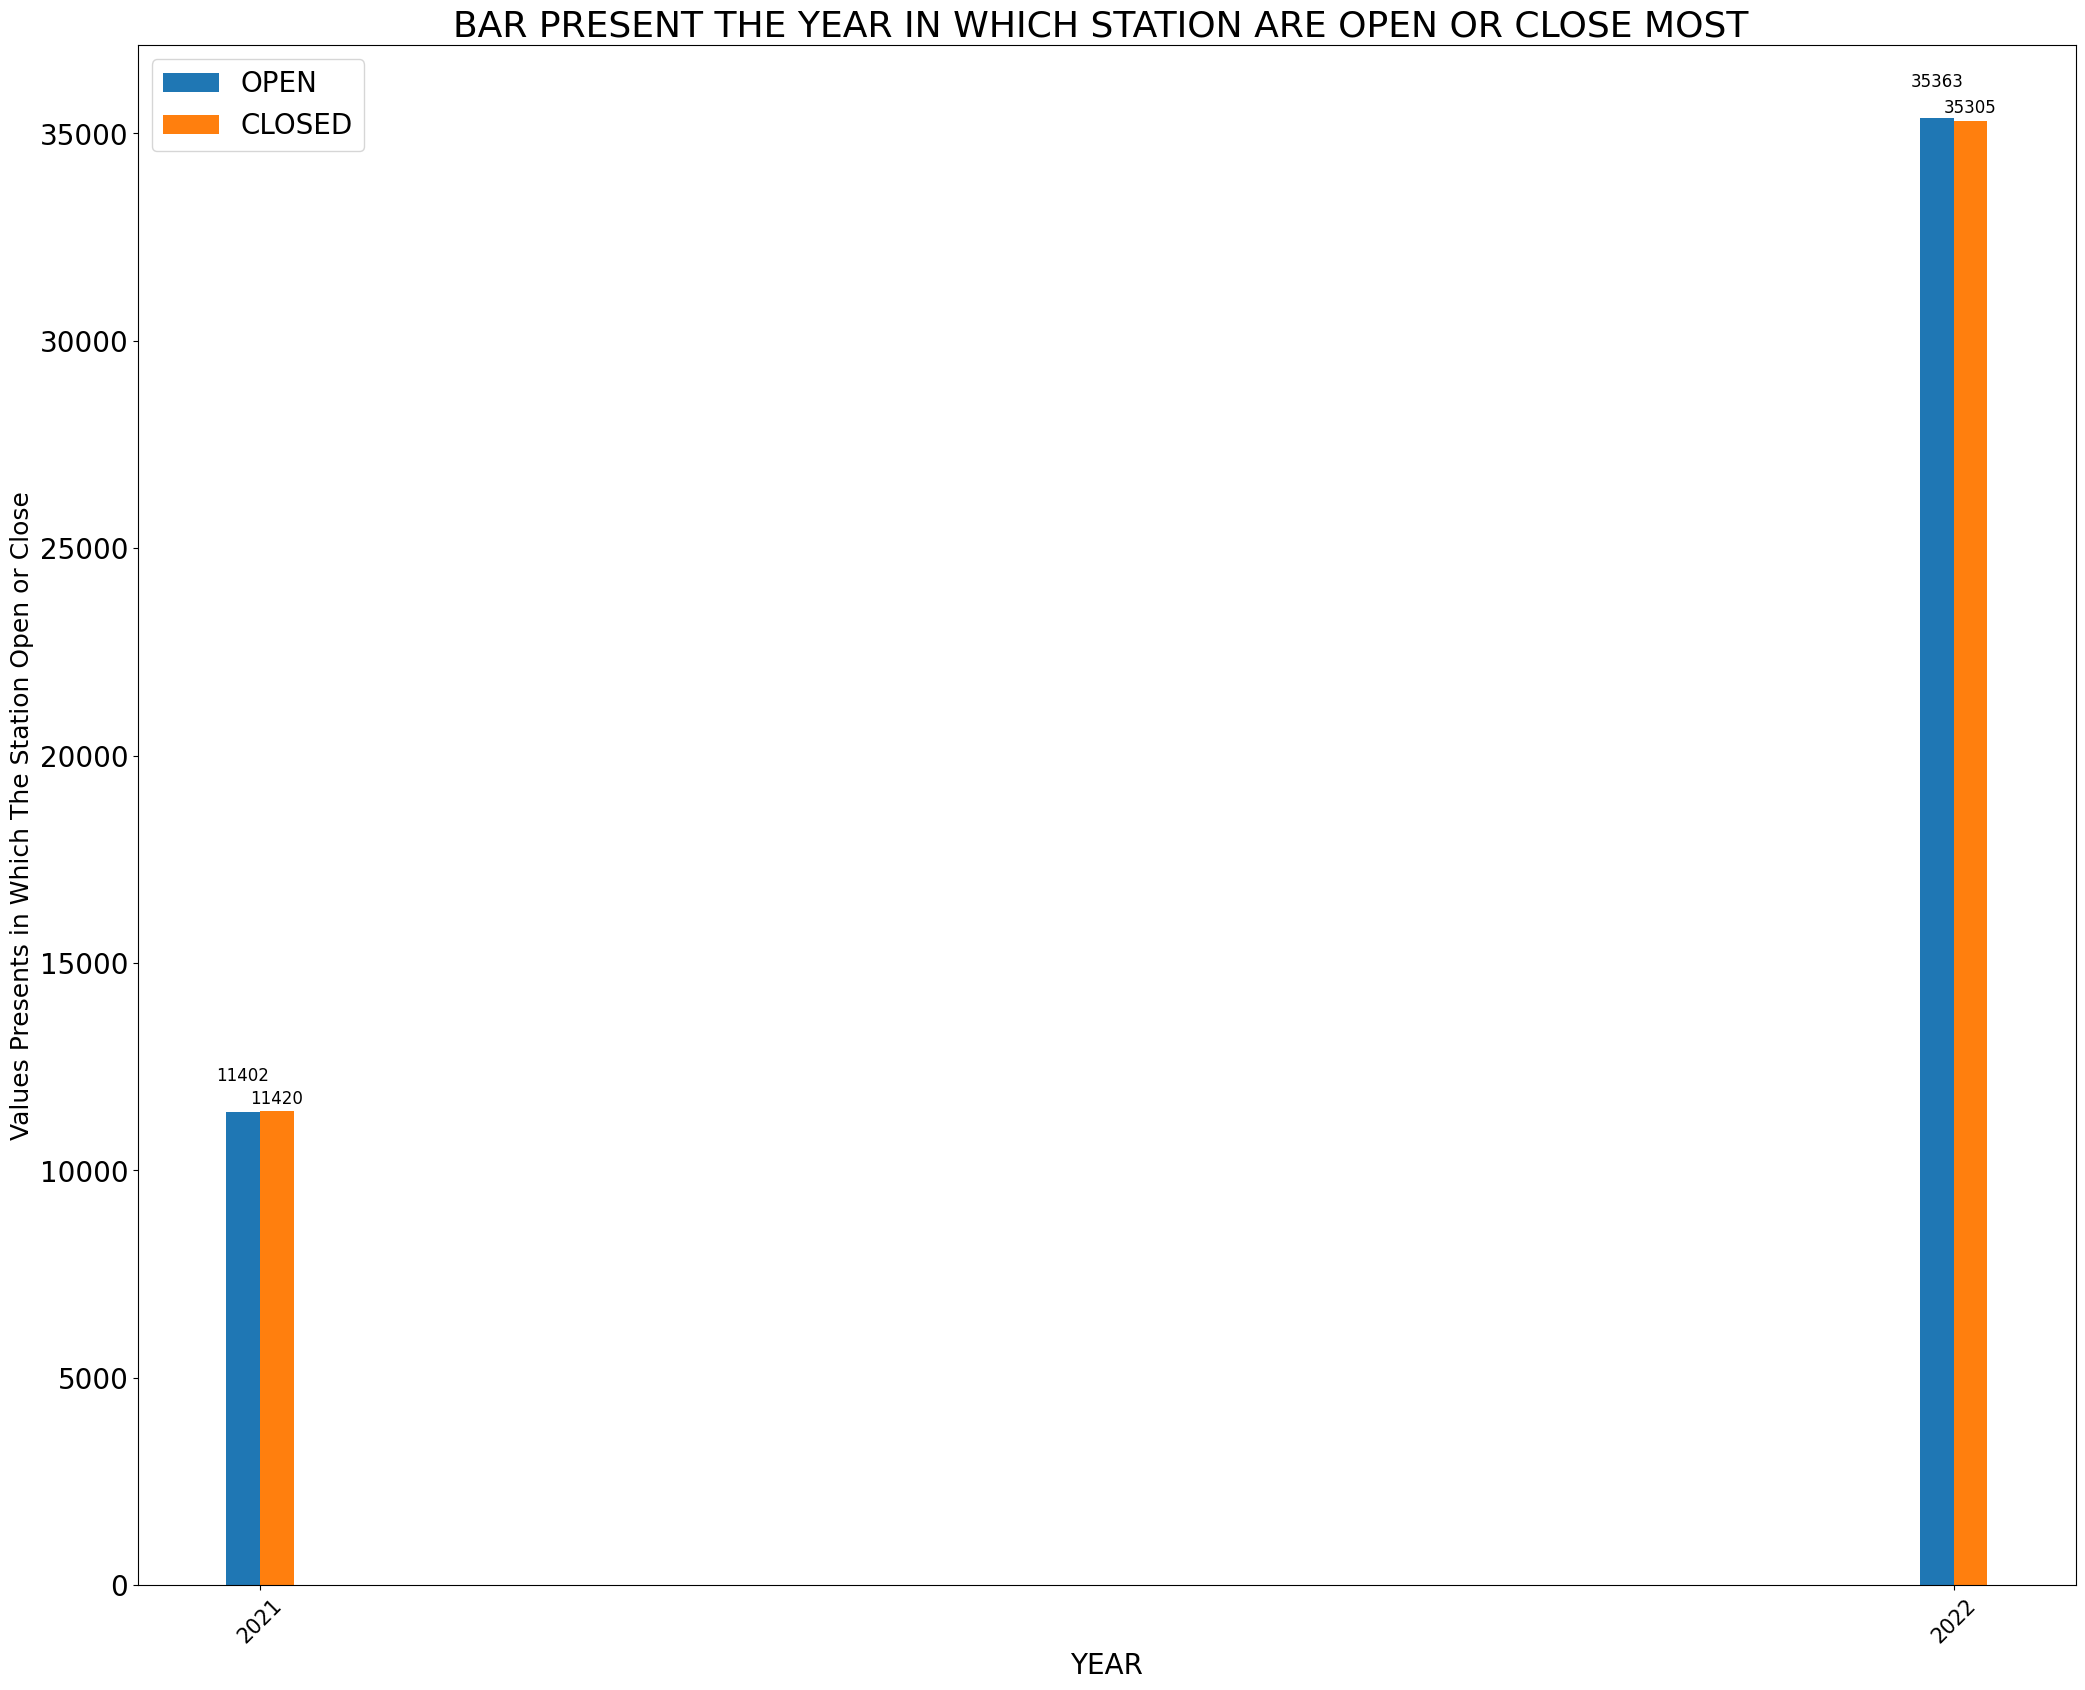

In [385]:
labels=list(hours_stations['Year'].unique())
l1=list(yes['Stations_Hours'])
l2=list(no['Stations_Hours'])
width = 0.02  # the width of the bars
fig, ax = plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(20)
x = np.arange(2021,2023)  # the label locations
rects1 = ax.bar(x - width/2,l1, width, label='OPEN')
rects2 = ax.bar(x + width/2,l2, width, label='CLOSED')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values Presents in Which The Station Open or Close',fontsize=18)
ax.set_xlabel('YEAR',fontsize=20)

ax.set_title('BAR PRESENT THE YEAR IN WHICH STATION ARE OPEN OR CLOSE MOST ',fontsize=26)
ax.set_xticks(labels)
ax.legend(fontsize=20)

ax.bar_label(rects1, padding=20,fontsize=12)
ax.bar_label(rects2, padding=3,fontsize=12)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)

plt.show()

In [386]:
hours_stations=df[['OpenYN','State']]
hours_stations=hours_stations.value_counts().reset_index().rename(columns={0:'Stations_Hours'})
hours_stations.sort_values(by=['State'],inplace=True)
yes=hours_stations.loc[(hours_stations['OpenYN']=='Y')]
no=hours_stations.loc[(hours_stations['OpenYN']=='N')]

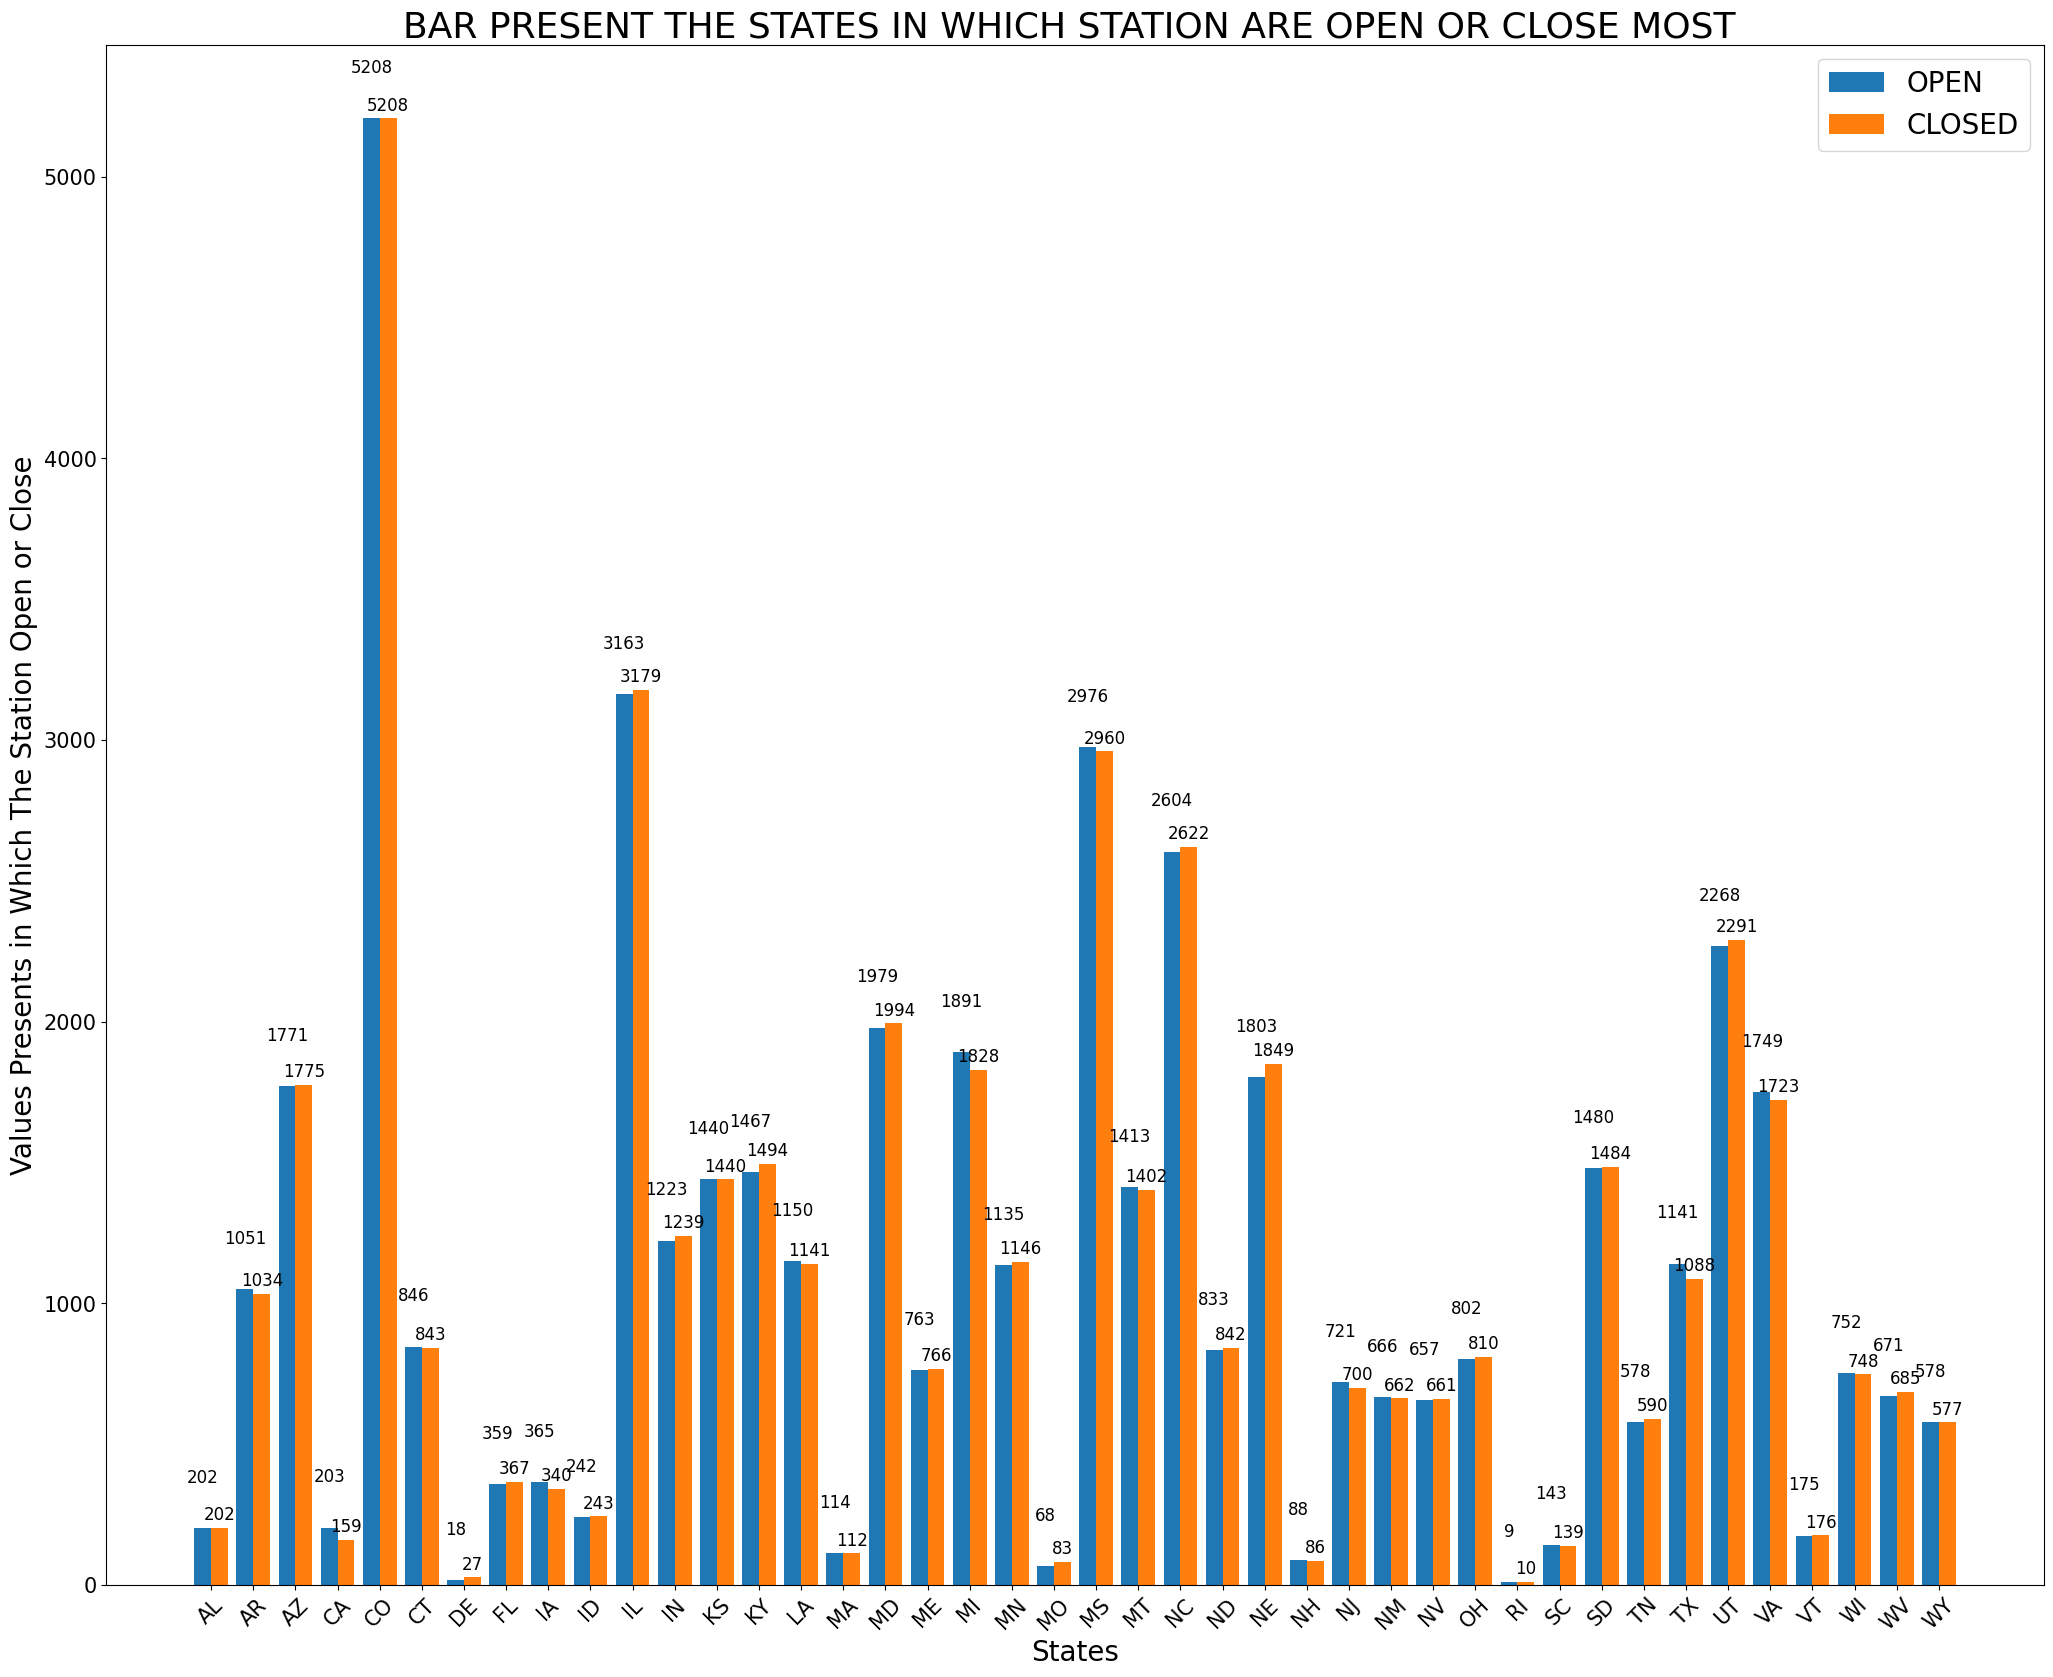

In [387]:
labels=list(hours_stations['State'].unique())
y1=list(yes['Stations_Hours'])
y2=list(no['Stations_Hours'])
width = 0.40  # the width of the bars
fig, ax = plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(20)
x = np.arange(42)  # the label locations
# plot data in grouped manner of bar type
rects1=plt.bar(x-width/2, y1, width,)
rects2=plt.bar(x+width/2, y2, width,)
ax.set_title('BAR PRESENT THE STATES IN WHICH STATION ARE OPEN OR CLOSE MOST ',fontsize=26)
plt.xticks(x, labels)
plt.xlabel("States",fontsize=20)
plt.ylabel("Values Presents in Which The Station Open or Close",fontsize=20)
plt.legend(["OPEN", "CLOSED"],fontsize=20)

ax.bar_label(rects1, padding=30,fontsize=12)
ax.bar_label(rects2, padding=3,fontsize=12)
plt.xticks(x,labels,rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Station are most open with respect to hour and minute**

In [389]:
most_opening_stations=df[['ID','OpenYN','Hour','Minute']]
most_opening_stations=most_opening_stations.loc[(most_opening_stations['OpenYN']=='Y')]
most_opening_stations=most_opening_stations.value_counts().reset_index().rename(columns={0:'Most_Opened_Stations'})

In [390]:
most_opening_stations.head(2)

ID OpenYN  Hour  Minute  Most_Opened_Stations
0  1190      Y    10      30                   104
1  1190      Y    11      30                    97

**Station are most close with respect to hour and minute**

In [392]:
most_close_stations=df[['ID','OpenYN','Hour','Minute']]
most_close_stations=most_close_stations.loc[(most_close_stations['OpenYN']=='N')]
most_close_stations=most_close_stations.value_counts().reset_index().rename(columns={0:'Most_Closed_Stations'})

In [393]:
most_close_stations.head(2)

ID OpenYN  Hour  Minute  Most_Closed_Stations
0  1190      N    19      30                   111
1  1190      N    20      30                    99

**Total No of Stations in each State**

In [394]:
stations_in_each_state=df[['State']]
stations_in_each_state=stations_in_each_state.value_counts().reset_index().rename(columns={0:'Stations_in_Each_State'})

### Bars Shows Number of Stations in all States

In [398]:

states = list(stations_in_each_state['State'])
counts = list(stations_in_each_state['Stations_in_Each_State'])


# sorting the bars means sorting the range factors

p = figure(x_range=states, height=450,width=950, title="States showing most number of stations",
           toolbar_location=None, tools="")

p.vbar(x=states, top=counts, width=0.8,fill_alpha = .5,
       fill_color = 'red',
       line_alpha = .5,
       line_color='blue',
       line_dash='dashed')

p.xgrid.grid_line_color = None
p.y_range.start = 0
#Signing the axis
p.xaxis.axis_label="State Names"
p.yaxis.axis_label="Number of stations present in all states "

output_notebook()
show(p)

Loading BokehJS ...

**State Having Most Opening Stations**

In [396]:
state_w_m_open_stations=df[['State','OpenYN']]
state_w_m_open_stations=state_w_m_open_stations.loc[(state_w_m_open_stations['OpenYN']=='Y')]
state_w_m_open_stations=state_w_m_open_stations.value_counts().reset_index().rename(columns={0:'State_Having_Most_Opening_Station'})

### Bars Shows Most Opened Number of Stations in all States

In [397]:

states = list(state_w_m_open_stations['State'])
counts = list(state_w_m_open_stations['State_Having_Most_Opening_Station'])


# sorting the bars means sorting the range factors

p = figure(x_range=states, height=450,width=950, title="States showing most open number of stations",
           toolbar_location=None, tools="")

p.vbar(x=states, top=counts, width=0.8,fill_alpha = .5,
       fill_color = 'red',
       line_alpha = .5,
       line_color='blue',
       line_dash='dashed')

p.xgrid.grid_line_color = None
p.y_range.start = 0
#Signing the axis
p.xaxis.axis_label="State Names"
p.yaxis.axis_label="Number of stations open in all states "

output_notebook()
show(p)

Loading BokehJS ...

**State Having Most Closed Stations**

In [399]:
state_w_m_closed_stations=df[['State','OpenYN']]
state_w_m_closed_stations=state_w_m_closed_stations.loc[(state_w_m_closed_stations['OpenYN']=='N')]
state_w_m_closed_stations=state_w_m_closed_stations.value_counts().reset_index().rename(columns={0:'State_Having_Most_Closed_Station'})

In [401]:
state_w_m_closed_stations.head(2)

State OpenYN  State_Having_Most_Closed_Station
0    CO      N                              5208
1    IL      N                              3179

### Bars Shows Most Closed Number of Stations in all States

In [402]:

states = list(state_w_m_closed_stations['State'])
counts = list(state_w_m_closed_stations['State_Having_Most_Closed_Station'])


# sorting the bars means sorting the range factors

p = figure(x_range=states, height=450,width=950, title="States showing number of stations that are most close",
           toolbar_location=None, tools="")

p.vbar(x=states, top=counts, width=0.8,fill_alpha = .5,
       fill_color = 'red',
       line_alpha = .5,
       line_color='blue',
       line_dash='dashed')

p.xgrid.grid_line_color = None
p.y_range.start = 0
#Signing the axis
p.xaxis.axis_label="State Names"
p.yaxis.axis_label="Number of stations closed in all states "

output_notebook()
show(p)

Loading BokehJS ...